In [1]:
# 비계층적 군집분석(K-means, K개의 평균으로 클러스터로 묶는 알고리즘)
# k값 찾고, 몇 개의 군집이어야 전체 데이터를 잘 설명하는가?
# 초기 K 값 설정
# 최적의 군집 개수를 결정하는 방법 3가지중 2가지
# 콜린스키 하라바츠 스코어 + 옐보우 방법 

In [27]:
import pandas as pd
from sklearn.cluster import KMeans

# 데이터 로드 (결측치 존재시 전처리 필요)
iris = pd.read_csv('data/iris.csv')
X = iris.drop('target', axis = 1)
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
# K-Means 군집화 실행
km = KMeans(n_clusters = 2, random_state = 1)
km.fit(X)

KMeans(n_clusters=2, random_state=1)

In [7]:
# 할단된 군집을 iris 데이터에 추가
new_labels = km.labels_
iris['cluster'] = new_labels

In [8]:
iris

,sepal length,sepal width,petal length,petal width,target,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


In [ ]:
# 콜린스키 하라바치 지수
# 클러스터 간 분산 / 클러스터 내 분산의 합
# 점수가 높을 수록 성능이 좋음
# 밀도 기반 클러스터에스는 디비스캣(?) 사용필요

In [11]:
# 군집분석 평가척도 : 콜린스키 하라바츠
from sklearn import metrics
metrics.calinski_harabasz_score(X, new_labels)

513.3038433517568

In [13]:
# 클러스터별 콜린스키 하라바츠 결과 비교
for k in range(2,10):
    kmeans_model = KMeans(n_clusters = k, random_state = 1).fit(X)
    labels = kmeans_model.labels_
    print(metrics.calinski_harabasz_score(X, labels))

513.3038433517568
560.3999242466402
529.1207190840455
494.0943819140986
474.51742958716295
448.8714494416451
436.61302488142496
414.5303174051382


In [ ]:
# iris 데이터는 군집이 3일 때, 가장 점수가 높음.

In [ ]:
# 엘보우 기법
# 클러스터 내 오차제곱합(SSE)을 클러스터 개수마다 비교
# 오차 제곱합이이 작을 수록 좋다.
# 클러스터 개수를 늘려가면서 계산한 SSE와 비교
# 늘려가면 SSE는 줄어든다
# 어느 순간 줄어드는 비율이 급격하게 작아지는 부분과 기울기가 소실되는 구간이 생김
# 그 부분이 최적의 클러스터 개수

In [28]:
import matplotlib.pyplot as plt
def elbow(X):
    sse=[]
    for i in range(1, 11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)

In [29]:
km.inertia_

152.36870647733906

C:\Users\KDB\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


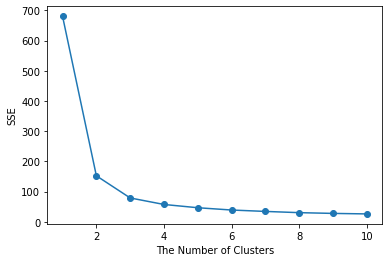

[680.8244, 152.36870647733906, 78.94084142614602, 57.345409315718165, 46.535582051282056, 38.95701115711985, 34.326529914529914, 30.227724598930482, 27.766706937799043, 26.07225182334006]


In [30]:
elbow(X)

In [32]:
# 위 그림에서 3에서 4로 갈때 기울기가 소실된 그러므로 군집의 수는 2~3이 적당.
# 위 그림은 애매하다. 콜린스키 하라바치 지수 같이 사용해서 군집의 수를 정하자.

In [ ]:
# 밀도기반 클러스터 DB_SCAN
# 특정한 밀도로 기반으로 이어지는 그래프에서 좋은 효과를 보인다.

In [33]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.5, min_samples = 5).fit(X) 
# eps : 하나의 점이 얼마나 가까운 점을 하나의 군집으로 묶을 것인가?
# > eps(거리 값)에 따라 군집 수가 달라진다.
# min_sampels = 가까이 있는 데이터가 5개 일 때 하나의 군집으로 묶겠다.
# DB_SCAN의 장점은 군집의 수를 지정하지 않아도 군집수를 결정한다.
dbscan

DBSCAN()

In [35]:
dbscan.labels_ # 0,1,-1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [43]:
dbscan_df = X.copy()
dbscan_df['cluster'] =  dbscan.labels_

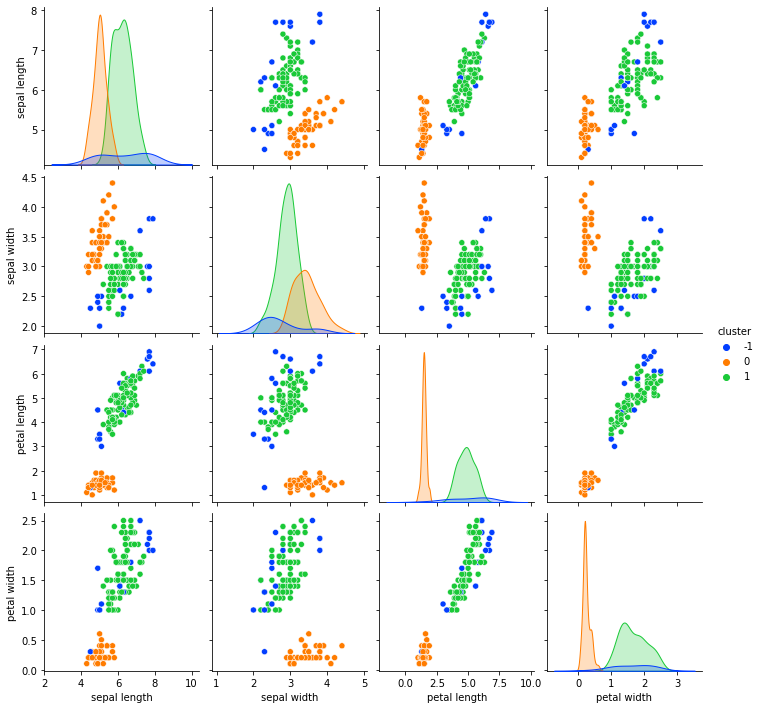

In [44]:
# dbscan_df 시각화 
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(dbscan_df,
             diag_kind='kde',
             hue="cluster",
#            corner = True,  #직각삼각형 모양으로 산점도 행렬 만드려면 주석해제
             palette='bright')
plt.show()

In [46]:
# 위의 결과를 보면, 원본 데이터와 많이 차이가 나는 것을 알 수 있다. 
# DBSCAN은 밀도기반 클러스터이기 때문에 위와 같은 데이터 분포의 특징을 잘 반영하지 못한다. 
# DB_SCAN은 많이 사용하지 X
# 데이터를 보고 분포를 파악하여 어떤 군집분석 알고리즘을 활용할지 결정 필요